In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Covid Data.csv')

In [3]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# mortality column

In [4]:
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [5]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [6]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)
df['DATE_DIED'] =  pd.to_datetime(df['DATE_DIED'])
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

# Data Cleaning

In [7]:
df_null = df.copy()
for i in [97, 98, 99]:
    df_null.replace(i , np.nan, inplace = True)
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
DEAD                         0
dtype: int64

## Pregnant

In [8]:
df['PREGNANT'].replace (97, 2, inplace = True)

In [9]:
df['PREGNANT'].value_counts()

#98 is the actual missing value
#1 means yes, 2 means no

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

# ICU

In [10]:
df['ICU'].replace (97, 2, inplace = True)

In [11]:
df.ICU.value_counts()
#99 is the actual missing values

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

# Intubed

In [12]:
df['INTUBED'].replace (97, 2, inplace = True)

In [13]:
df.INTUBED.value_counts()
#99 actual missing value

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

In [14]:
# Let's have a look on our data's different classes:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i," -> ", dict(df[i].value_counts()))

USMER  ->  {2: 662903, 1: 385672}
MEDICAL_UNIT  ->  {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX  ->  {1: 525064, 2: 523511}
PATIENT_TYPE  ->  {1: 848544, 2: 200031}
INTUBED  ->  {2: 1007594, 1: 33656, 99: 7325}
PNEUMONIA  ->  {2: 892534, 1: 140038, 99: 16003}
PREGNANT  ->  {2: 1036690, 1: 8131, 98: 3754}
DIABETES  ->  {2: 920248, 1: 124989, 98: 3338}
COPD  ->  {2: 1030510, 1: 15062, 98: 3003}
ASTHMA  ->  {2: 1014024, 1: 31572, 98: 2979}
INMSUPR  ->  {2: 1031001, 1: 14170, 98: 3404}
HIPERTENSION  ->  {2: 882742, 1: 162729, 98: 3104}
OTHER_DISEASE  ->  {2: 1015490, 1: 28040, 98: 5045}
CARDIOVASCULAR  ->  {2: 1024730, 1: 20769, 98: 3076}
OBESITY  ->  {2: 885727, 1: 159816, 98: 3032}
RENAL_CHRONIC  ->  {2: 1026665, 1: 18904, 98: 3006}
TOBACCO  ->  {2: 960979, 1: 84376, 98: 3220}
CLASIFFICATION_FINAL  ->  {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU  ->  {2: 1024229, 1: 16858,

In [15]:
dict(df['DEAD'].value_counts())[1]

76942

Text(0, 0.5, 'Count')

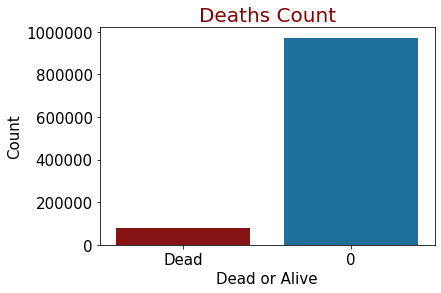

In [16]:
D = df['DEAD']
D = D.replace(1, "Dead")
D = D.replace(2, "Alive")
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Deaths Count', color = '#800000', fontsize = 20)
sns.countplot(x=D, palette = ['#990000',"#0a75ad"])
plt.xlabel("Dead or Alive", fontsize=15)
plt.ylabel("Count", fontsize=15)

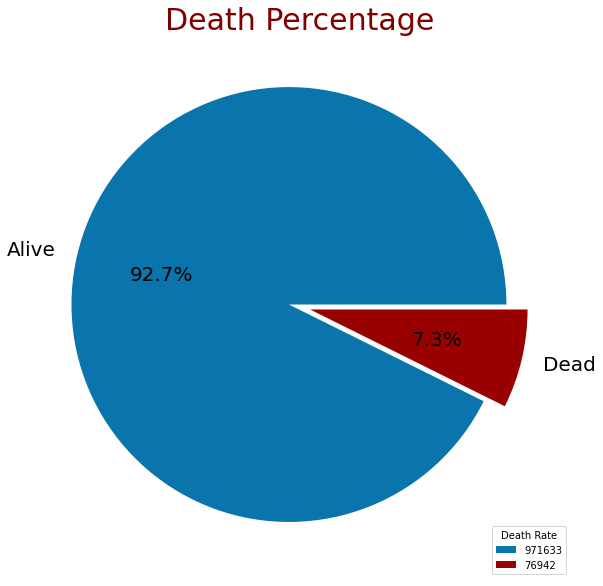

In [17]:
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [18]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [19]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

In [20]:
df["Covid_or_Not"].value_counts()

Not a Covid 19 Carrier    656596
A Covid 19 Carrier        391979
Name: Covid_or_Not, dtype: int64

In [21]:
Covid_deaths = df[(df['Covid_or_Not'] == "A Covid 19 Carrier")]

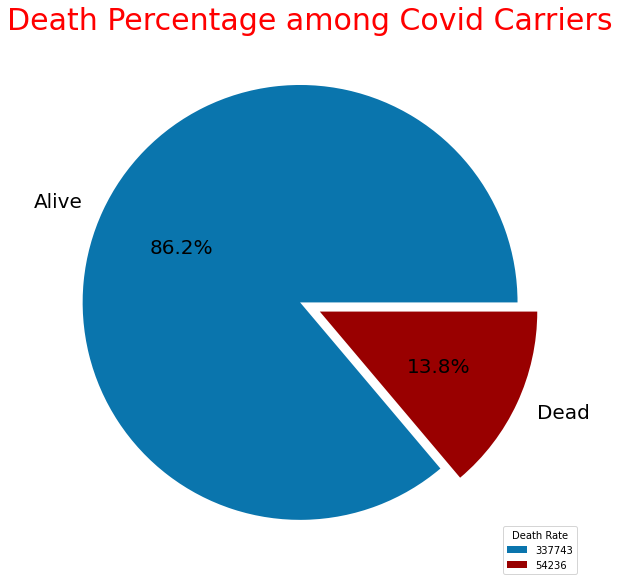

In [22]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_deaths['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [23]:
Covid_deaths[(Covid_deaths['ICU'] == 2)]['DEAD'].value_counts()

0    332967
1     47042
Name: DEAD, dtype: int64

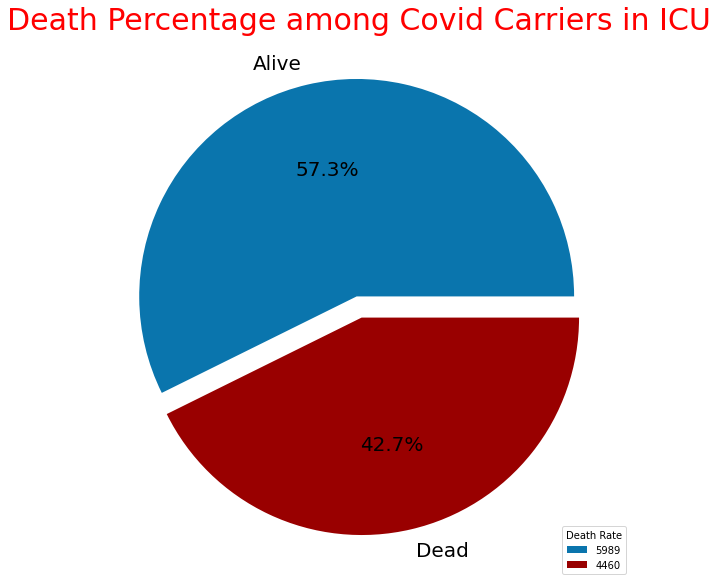

In [24]:
labels = ["Alive", "Dead"]
sizes = Covid_deaths[(Covid_deaths['ICU'] == 1)]['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers in ICU',color = 'red',fontsize = 30)
plt.legend(Covid_deaths[(Covid_deaths['ICU'] == 1)]['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [25]:
Covid_deaths['ICU'].value_counts()

2     380009
1      10449
99      1521
Name: ICU, dtype: int64

# drop null values

In [26]:
df_null = df.copy()
for i in [97, 98, 99]:
    df_null.replace(i , np.nan, inplace = True)
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                   7325
PNEUMONIA                16003
AGE                        345
PREGNANT                  3754
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                       7488
DEAD                         0
Covid_or_Not                 0
dtype: int64

In [27]:
df.to_csv("full_data_with_missing_value.csv",index = False)

In [28]:
df_clean = df.copy()

In [29]:
df_clean = df_null.drop(['DATE_DIED'],axis= 1)
df_clean.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEAD',
       'Covid_or_Not'],
      dtype='object')

In [30]:
df.shape

(1048575, 23)

In [31]:
df_clean = df_clean.dropna()
df_clean.shape

(1019345, 22)

In [32]:
df_clean.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEAD                    0
Covid_or_Not            0
dtype: int64

In [33]:
df_clean.to_csv('fulldata_clean.csv',index = False)